# <font color='red'> <div align='center'> Lojistik_Regresyon_ile_Siniflandirma


##### Bu ödevde, modelinizi kullanarak Titanic faciasında hayatta kalma durumunu tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

##### Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.

##### Verilerinizi eğitim ve test kümelerine ayırın.

##### Modelinizi oluşturarak ayırdığınız test kümesindeki verilere göre hayatta kalma durumlarını tahmin edin.

##### Modelinizin performansı tatmin edici mi? Açıklayın.

##### Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

##### Lojistik Regresyon'un avantaj ve dezavantajlarını araştırın ve mentörünüzle tartışın.

In [1]:
#Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.
import pandas as pd
titanic = pd.read_csv('data/titanic_data.csv') # id olsaydi "index_col=0" ekleyebilirdim.

In [2]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic['Target']= titanic['Survived'].map({0:'Not Survived', 1:'Survived'})

In [4]:
titanic['Target'].head(15)

0     Not Survived
1         Survived
2         Survived
3         Survived
4     Not Survived
5     Not Survived
6     Not Survived
7     Not Survived
8         Survived
9         Survived
10        Survived
11        Survived
12    Not Survived
13    Not Survived
14    Not Survived
Name: Target, dtype: object

In [5]:
#a=titanic.groupby(by=["Sex","Target"])

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Target         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [7]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Not Survived
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Not Survived
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Not Survived
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Survived
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Survived


In [8]:
titanic.drop('Cabin', inplace=True, axis=1)

In [9]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [10]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Survived
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Survived


In [11]:
titanic[titanic['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Not Survived
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Survived
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Survived
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Not Survived
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Survived
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,Not Survived
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,Survived
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q,Survived
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,Survived
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C,Not Survived


In [12]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())

In [13]:
#Calismadi neden? titanic = titanic.groupby(titanic.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [14]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Not Survived
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Not Survived
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Not Survived
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Not Survived
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Survived
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Survived


In [15]:
titanic[titanic['Ticket'] == 113572]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target


In [16]:
titanic[titanic['PassengerId'] == 62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Survived


In [17]:
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [18]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target


In [19]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [40]:
corr_matrix = titanic.corr()
corr_list =  corr_matrix.Survived.abs().sort_values(ascending=False).index[1:]

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

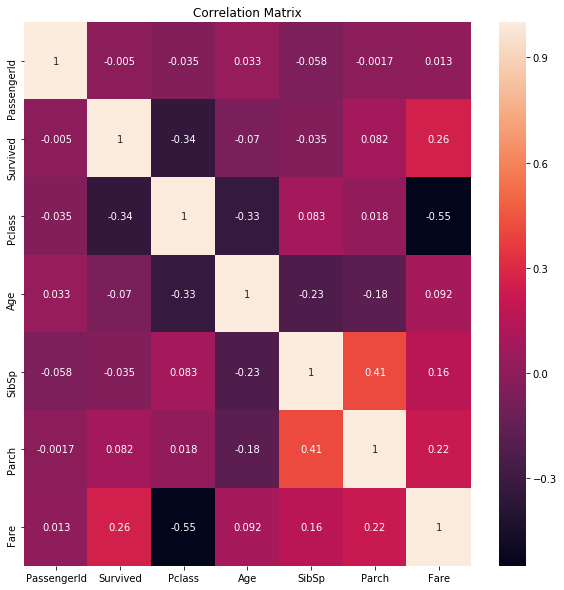

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 10)

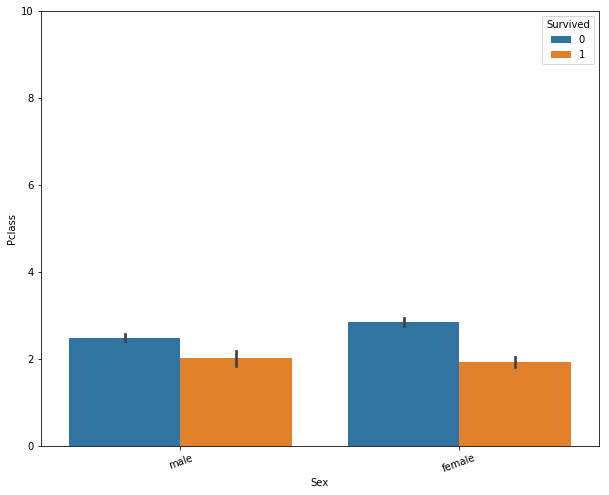

In [42]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x="Sex", y="Pclass", hue="Survived", data=titanic)
plt.xticks(rotation=20)
plt.ylim((0,10))

male_not_survived = titanic[titanic['Sex'] == 'male'] == 'Not Survived'
male_survived = titanic[titanic['Sex'] == 'male'] == 'Survived'

female_not_survived =titanic[titanic['Sex'] == 'female'] == 'Not Survived'
female_survived =titanic[titanic['Sex'] == 'female'] == 'Survived'

len(male_survived)

len(titanic['Sex'] == 'male')

len(titanic[titanic['Sex'] == 'female'] =='Not Survived' )

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Not Survived


In [28]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [87]:
X = titanic[corr_list]
y = titanic.iloc[:,1].values

In [88]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[:, 0], X[:,1], s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("Taç yaprak boyutları", fontdict = baslik_font)
plt.xlabel("Taç yaprak uzunluğu", fontdict = eksen_font)
plt.ylabel("Taç yaprak genişliği", fontdict = eksen_font)
plt.show()

TypeError: unhashable type: 'slice'

<Figure size 720x432 with 0 Axes>

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [90]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [91]:
log_reg.fit(X_eğitim, y_eğitim)

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### One vs Rest

In [92]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')


One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.70


In [93]:
y_pred = log_reg.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[96, 17],
       [36, 30]], dtype=int64)

In [96]:
print("Doğruluk Oranı: %",((96+30) /180)*100)

Doğruluk Oranı: % 70.0


#### Multinomial (Softmax)

In [98]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.70


C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [102]:
y_pred = log_reg_mnm.predict(X_test)

In [103]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  13],
       [ 40,  26]], dtype=int64)

In [104]:
print("Doğruluk Oranı: %",((126+30) /179)*100)

Doğruluk Oranı: % 87.15083798882681


In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(X.values, s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("Taç yaprak boyutları", fontdict = baslik_font)
plt.xlabel("Taç yaprak uzunluğu", fontdict = eksen_font)
plt.ylabel("Taç yaprak genişliği", fontdict = eksen_font)
plt.show()

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

<Figure size 720x432 with 0 Axes>